In [3]:
import re
import matplotlib.pyplot as plt
%matplotlib inline
import random
import networkx

In [ ]:
# I expect the distribution to be similar to the uniform distribution becuase all the links are added independently with no correlation with the node degree.

In [16]:
n = 100
m = 500
vv=0
nn=0
net = networkx.Graph()
for i in range(n):
    net.add_node(i)
nodes = list(net.nodes())
edges_number = 0
while True:
    if edges_number == 500:
        break
    a = random.choice(nodes)
    b = random.choice(nodes)
    if a != b and not net.has_edge(a,b):
        vv += 1
        net.add_edge(a,b)
        edges_number += 1
    else:
        nn += 1


/opt/conda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


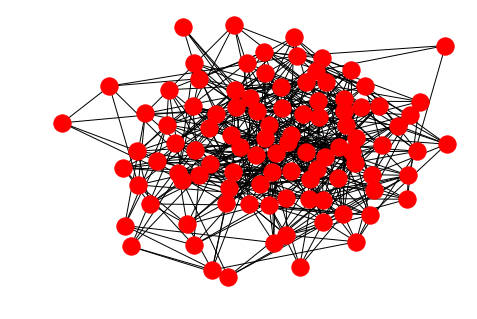

In [26]:
_ = networkx.draw(net)

In [32]:
centralties = sorted((indeg * (n-1), node)
       for node,indeg in networkx.degree_centrality(net).items())

In [33]:
edges = [t for t in net.edges()]

In [34]:
target_centralites = [24, 21, 19, 19, 15, 14]

In [41]:
l = len(centralties) - 1
bl = [centralties[l-i][1] for i in range(5)]

In [36]:
def rewire(network, edge, node):
    network.remove_edge(edge[0],edge[1])
    network.add_edge(node, edge[0])

In [37]:
i = 0
n = len(centralties) - 1
node = centralties[n][1]
while True:
    if centralties[n][0] >= target_centralites[i]:
        break
    ed = random.choice(edges)
    if ed[0] not in bl and ed[1] not in bl:
        rewire(net, ed,node)
        centralties = sorted((indeg * (n-1), node)
           for node,indeg in networkx.degree_centrality(net).items())
        edges = [t for t in net.edges()]

In [38]:
for i in range(len(desired_centralites)):
    n = len(centralties) - i - 1
    node = centralties[n][1]
    while True:
        if centralties[n][0] >= target_centralites[i]:
            break
        ed = random.choice(edges)
        if ed[0] not in bl and ed[1] not in bl:
            rewire_step(net, ed,node)
            centralties = sorted((indeg * (n-1), node)
               for node,indeg in networkx.degree_centrality(net).items())
            edges = [t for t in net.edges()]

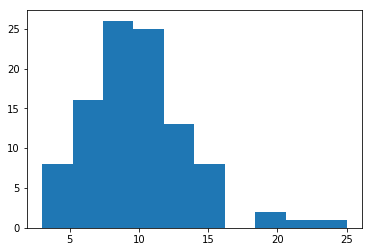

In [39]:
degrees = net.degree()

l = []

for i in Degree:
    l.append(i[1])

_ = plt.hist(l)